# Prácticas con Python
En este notebooks veremos conceptos básicos de python

In [1]:
%%bash 
wget  https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv

--2018-10-25 18:21:48--  https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494688 (1.4M) [text/plain]
Saving to: ‘movie_metadata.csv’

     0K .......... .......... .......... .......... ..........  3% 1.99M 1s
    50K .......... .......... .......... .......... ..........  6% 5.32M 0s
   100K .......... .......... .......... .......... .......... 10% 11.6M 0s
   150K .......... .......... .......... .......... .......... 13% 6.81M 0s
   200K .......... .......... .......... .......... .......... 17% 11.4M 0s
   250K .......... .......... .......... .......... .......... 20% 7.11M 0s
   300K .......... .......... .......... .......... .......... 23% 11.3M 0s
   350K .......... .......... .......... ......

## Importamos las librerías que vamos a usar
%matplotlib es un comando "mágico" de los jupyter notebooks que permite visualizar dentro del mismo notebook gráficas creadas.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np


## Cargamos los datos
Para ello usamos pd.read_csv aunque existen otras funciones de pandas que permiten leer, csv comprimidos (csv.gzip), tablas (read_table), bases de datos, excels,...


Para más información: [Pandas IO](https://pandas.pydata.org/pandas-docs/stable/io.html)

In [8]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
pd.read_csv?

Podemos cargarlos directamente añadiendo un índice, añadiendo un separador:","; na_values , nrows, thousands=None, decimal=b'.',


In [10]:
pd.read_csv('movie_metadata.csv',index_col="movie_title",sep=",").head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Veamos qué nombre de  columnas tenemos

In [11]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [13]:
data.shape

(5043, 28)

Breve inspección de los datos

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

veamos el tipo de variable que tienen

In [15]:
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Veamos estadísticas de las variables numéricas

In [16]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### slices in dataframes
#### acceder a columnas
- accediendo al nombre de la variable mediante df.<var\>. Ojo, si se llama igual que método hay problema
- accediendo mediante corchetes df[<var\>]
- accediendo a multiples columnas mediante [["var1","var2","var3"]]
#### acceder a filas
- df.iloc[numero fila]
- df.loc[index referencia]
- df[var][num_fil:_fin_fila]
- df.loc[condicion] o df[condicion]

In [17]:
data.budget.head()

0    237000000.0
1    300000000.0
2    245000000.0
3    250000000.0
4            NaN
Name: budget, dtype: float64

In [18]:
data["duration"].head()

0    178.0
1    169.0
2    148.0
3    164.0
4      NaN
Name: duration, dtype: float64

In [19]:
 data[["budget","gross"]].head()

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
4,NaN,NaN


In [20]:
data["duration"][:10]

0    178.0
1    169.0
2    148.0
3    164.0
4      NaN
5    132.0
6    156.0
7    100.0
8    141.0
9    153.0
Name: duration, dtype: float64

In [21]:
data[data["duration"] > 120].head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [52]:
data[:10]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
avatar,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
pirates of the caribbean: at world's end,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
spectre,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
the dark knight rises,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
star wars: episode vii - the force awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
john carter,0,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
spider-man 3,0,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
tangled,0,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
avengers: age of ultron,0,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


In [55]:
 data['num_critic_for_reviews'].dropna().astype(int).head()

movie_title
avatar                                      723
pirates of the caribbean: at world's end    302
spectre                                     602
the dark knight rises                       813
john carter                                 462
Name: num_critic_for_reviews, dtype: int64

### Ejercicio práctico
- Determina cuantas filtas tienen en facebook  más de 500 likes
- Determina qué pelicula con duración mayor de 130 minutos y que tengan más de 200000 likes en facebook

### Extraer valores únicos

inspeccionamos qué valores hay para la variable color

In [22]:
data.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

conteamos los valores únicos

In [56]:
data.color.value_counts()

0                   4772
 Black and White     207
Name: color, dtype: int64

In [59]:
data.color.sort_index().head()

movie_title
#horror                         0
10 cloverfield lane             0
10 days in a madhouse           0
10 things i hate about you      0
10,000 b.c.                   NaN
Name: color, dtype: object

### agrupaciones con groupby


In [63]:
data.groupby("country").duration.mean().head()

country
Afghanistan     83.000000
Argentina      108.000000
Aruba           91.000000
Australia      105.518519
Bahamas         94.000000
Name: duration, dtype: float64

## ejemplo de remplazar valores

In [23]:
data.color=data.color.replace({'Color':0,'Black and White':1})

### Ejercicio práctico
- Pregunta, color es una variable categórica o continua?
- Determina qué directores  tienen en facebook  más de 500 likes

## Evaluar los nulos

In [24]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Veamos cuales son los nulos correspondientes en num_critic_for_reviews        

In [51]:
data[data.num_critic_for_reviews.isna()].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
star wars: episode vii - the force awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
"10,000 b.c.",NaN,Christopher Barnard,NaN,22.0,0.0,NaN,,5.0,NaN,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
black water transit,0,Tony Kaye,NaN,NaN,194.0,816.0,Aisha Tyler,970.0,NaN,Crime|Drama,...,NaN,English,USA,NaN,23000000.0,2009.0,856.0,7.2,NaN,26
fired up,0,NaN,NaN,30.0,NaN,215.0,Mark Feuerstein,909.0,NaN,Comedy,...,6.0,English,USA,NaN,NaN,NaN,417.0,6.7,1.33,4
the doombolt chase,0,NaN,NaN,30.0,NaN,9.0,George Coulouris,310.0,NaN,Drama|Family,...,NaN,English,UK,NaN,NaN,NaN,11.0,7.2,NaN,0


Eliminar los valores nulos

In [26]:
data.actor_2_name=data.actor_2_name.fillna("")

## Evaluar los duplicados

In [27]:
data.duplicated().sum()

45

In [28]:
data["movie_title"].duplicated().sum()


126

In [29]:
movieTitle=data["movie_title"]
movieTitle[movieTitle.duplicated()]


137                          The Legend of Tarzan 
187     The Twilight Saga: Breaking Dawn - Part 2 
204                           Godzilla Resurgence 
303                                           Pan 
389                                Fantastic Four 
395                      The Fast and the Furious 
590                                      Hercules 
656                                  Total Recall 
794                                  The Avengers 
1122                                        Dredd 
1220                                     Unbroken 
1305                          Victor Frankenstein 
1332                     The Fast and the Furious 
1449                                    From Hell 
1508                                   The Lovers 
1582                                 Ghostbusters 
1805                              The Jungle Book 
1994                            Snakes on a Plane 
2020                                  Point Break 
2049                           

In [30]:
data.duplicated().count()

5043

Eliminamos los duplicados

In [31]:
data=data.drop_duplicates()

## evaluaciones con columnas tipo strings
Para acceder a una variable como string, debemos poner la columna junto con comando str

In [32]:
len(data.director_name.unique())

2399

Vamos a convertir a lowercase

In [33]:
data.director_name.str.lower().head()

0        james cameron
1       gore verbinski
2           sam mendes
3    christopher nolan
4          doug walker
Name: director_name, dtype: object

La columna tipo string que contiene generos podemos dividirla por |

In [34]:
data.genres.str.split("|").head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: genres, dtype: object

## Añadir un indice
Los indices nos ayudan a la hora de filtrar datos o identificarlos y poder trabajar mejor con ellos. En este caso pondremos movie_title

In [35]:
data=data.set_index("movie_title")

In [36]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [37]:
data.reset_index(inplace=True)
data.movie_title=data.movie_title.str.strip().str.lower()
data=data.set_index("movie_title")

In [38]:
data.loc["avatar"]

color                                                                        0
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
num_voted_users                                                         886204
cast_total_facebook_likes                           

In [39]:
str_cols=data.dtypes[data.dtypes==object].index.values

In [40]:
data[str_cols].apply(lambda x:x.str.lower(),axis=0)

,color,director_name,actor_2_name,genres,actor_1_name,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
movie_title,,,,,,,,,,,
avatar,NaN,james cameron,joel david moore,action|adventure|fantasy|sci-fi,cch pounder,wes studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,english,usa,pg-13
pirates of the caribbean: at world's end,NaN,gore verbinski,orlando bloom,action|adventure|fantasy,johnny depp,jack davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,english,usa,pg-13
spectre,NaN,sam mendes,rory kinnear,action|adventure|thriller,christoph waltz,stephanie sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,english,uk,pg-13
the dark knight rises,NaN,christopher nolan,christian bale,action|thriller,tom hardy,joseph gordon-levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,english,usa,pg-13
star wars: episode vii - the force awakens,NaN,doug walker,rob walker,documentary,doug walker,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN
john carter,NaN,andrew stanton,samantha morton,action|adventure|sci-fi,daryl sabara,polly walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,english,usa,pg-13
spider-man 3,NaN,sam raimi,james franco,action|adventure|romance,j.k. simmons,kirsten dunst,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,english,usa,pg-13
tangled,NaN,nathan greno,donna murphy,adventure|animation|comedy|family|fantasy|musi...,brad garrett,m.c. gainey,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,english,usa,pg
avengers: age of ultron,NaN,joss whedon,robert downey jr.,action|adventure|sci-fi,chris hemsworth,scarlett johansson,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,english,usa,pg-13


## visualización

In [41]:
data.language.value_counts().head()

English     4662
French        73
Spanish       40
Hindi         28
Mandarin      24
Name: language, dtype: int64

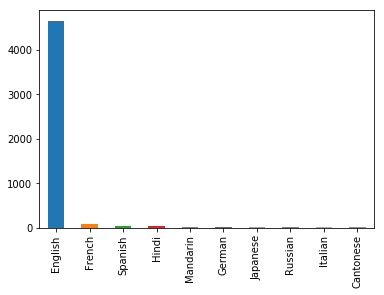

In [42]:
data.language.value_counts().head(10).plot(kind="bar")

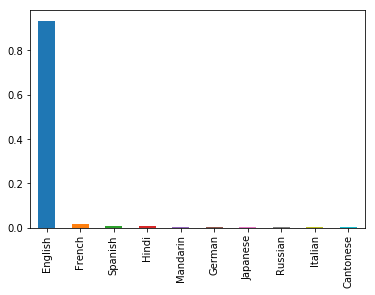

In [43]:
data.language.value_counts(normalize=True).head(10).plot(kind="bar")

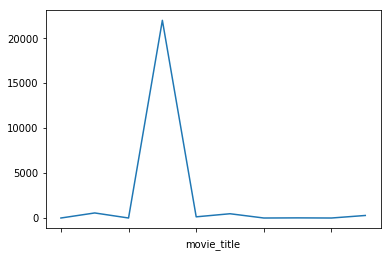

In [44]:
data.iloc[0:10].director_facebook_likes.plot()

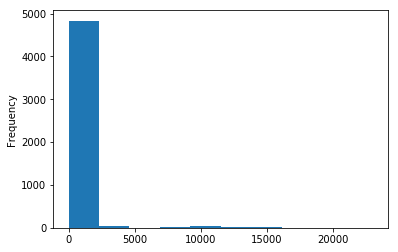

In [45]:
data.actor_3_facebook_likes.plot(kind="hist")

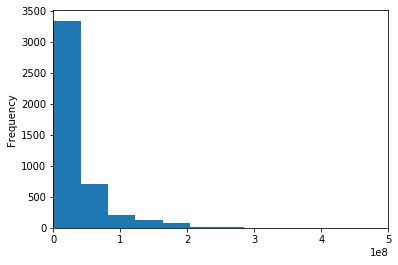

In [46]:
data.budget.plot(kind="hist",xlim=(0,5e8),bins=300)

# modificación de nombres de columnas

In [50]:
data.rename(columns={"num_critic_for_reviews":"num_critic_rev"})

,color,director_name,num_critic_rev,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
avatar,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
pirates of the caribbean: at world's end,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
spectre,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
the dark knight rises,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
star wars: episode vii - the force awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
john carter,0,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
spider-man 3,0,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
tangled,0,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
avengers: age of ultron,0,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


## Como guardar un data frame

In [ ]:
data.to_csv('cleanfile.csv' encoding = 'utf-8')

## otras funciones importantes

In [64]:
pd.to_datetime('1868/3/23')


Timestamp('1868-03-23 00:00:00')

In [65]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')


Timestamp('1868-03-23 00:00:00')

In [76]:
data.insert(loc=0, column='date',
          value=pd.to_datetime(data['title_year'].fillna("1901").map(lambda x:"{0}/01/01".format(int(x)))))

In [77]:
data.head()

,date,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
avatar,2009-01-01,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
pirates of the caribbean: at world's end,2007-01-01,0,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
spectre,2015-01-01,0,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
the dark knight rises,2012-01-01,0,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
star wars: episode vii - the force awakens,1901-01-01,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
